# IL181.009: Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Problem 1

In [2]:
# setting the initial conditions:
theta_t0 = 0
omega_t0 = 0.5
dt = 0.1
Ns = 300
g = 9.8
l = 1
m=1

def euler(): # the Euler's method
    # setting empty values to be filled:
    theta_ts_euler = np.zeros(Ns+1)
    omega_ts_euler = np.zeros(Ns+1)
    KE_s_euler = np.zeros(Ns+1)
    PE_s_euler = np.zeros(Ns+1)

    dts = np.zeros(Ns+1)
    #initial values
    theta_ts_euler[0] = theta_t0
    omega_ts_euler[0] = omega_t0

    
    #running the simulation:
    for t in range(Ns):
        omega_ts_euler[t+1] = omega_ts_euler[t]  - g/l * dt*np.sin(theta_ts_euler[t])
        theta_ts_euler[t+1] =theta_ts_euler[t] + omega_ts_euler[t+1]*dt
        KE_s_euler[t] = (1/2)*m*((m*l**2)**2) * omega_ts_euler[t+1]**2
        PE_s_euler[t] = m*g*l*(1-np.cos(theta_ts_euler[t+1]))

        dts[t+1] = dts[t]+dt

    # the total energy:
    TE_vec_euler = np.add(KE_s_euler,PE_s_euler)
    
    
    return dts, theta_ts_euler, omega_ts_euler, KE_s_euler,PE_s_euler, TE_vec_euler

dts, theta_ts_euler, omega_ts_euler, KE_s_euler,PE_s_euler,TE_vec_euler  = euler()


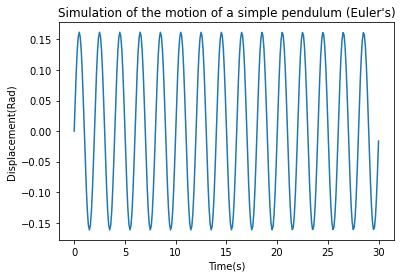

In [3]:
plt.plot(dts,theta_ts_euler )
plt.xlabel("Time(s)")
plt.ylabel("Displacement(Rad)")
plt.title("Simulation of the motion of a simple pendulum (Euler's)")
plt.show()

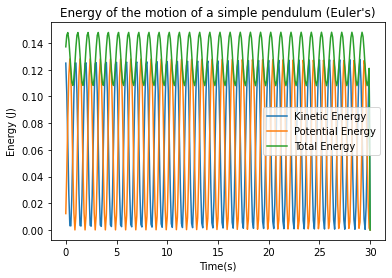

In [4]:
plt.plot(dts,KE_s_euler, label = "Kinetic Energy" )
plt.plot(dts,PE_s_euler, label = "Potential Energy")
plt.plot(dts, TE_vec_euler, label = "Total Energy")
plt.xlabel("Time(s)")
plt.ylabel("Energy (J)")
plt.title("Energy of the motion of a simple pendulum (Euler's)")
plt.legend()

plt.show()

In [5]:
def exact(): # using the analytical solution to get the exact values
    
    A = max(theta_ts_euler) # taking the amplitude to be the maximum theta that euler's reached
                            # for consistency    
    thetas_exact = []
    omegas_exact= []
    g = 9.8
    l = 1

    KE_s_exact = []
    PE_s_exact = []
    
    
    # running the simulations
    for t in dts:
        thetas_exact.append(A*np.sin(  np.sqrt(g/l) *t ) )
        omegas_exact.append(A*np.sqrt(g/l)*np.cos( np.sqrt(g/l) *t  ) )

        KE_s_exact.append((1/2)*m*((m*l**2)**2) * omegas_exact[-1]**2)
        PE_s_exact.append(m*g*l*(1-np.cos(thetas_exact[-1])))

    TE_vec_exact = np.add(KE_s_exact,PE_s_exact)

    return dts, thetas_exact, omegas_exact, KE_s_exact,PE_s_exact,TE_vec_exact
dts, thetas_exact, omegas_exact, KE_s_exact,PE_s_exact,TE_vec_exact = exact()

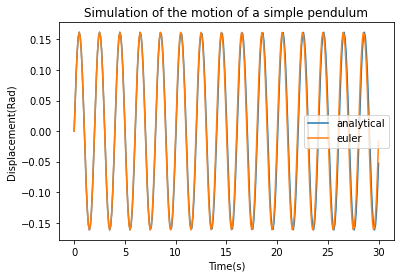

In [6]:
plt.plot(dts,thetas_exact, label = 'analytical' )
plt.plot(dts,theta_ts_euler, label = 'euler' )

plt.xlabel("Time(s)")
plt.ylabel("Displacement(Rad)")
plt.title("Simulation of the motion of a simple pendulum")
plt.legend()
plt.show()

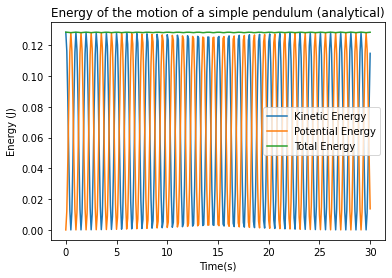

In [7]:
plt.plot(dts,KE_s_exact, label = "Kinetic Energy" )
plt.plot(dts,PE_s_exact, label = "Potential Energy")
plt.plot(dts, TE_vec_exact, label = "Total Energy")
plt.xlabel("Time(s)")
plt.ylabel("Energy (J)")
plt.title("Energy of the motion of a simple pendulum (analytical)")
plt.legend()

plt.show()

In [8]:
mean_squared_error(thetas_exact, theta_ts_euler)

0.00023456387438747545

In [9]:
def f1(t, theta, omgea): # function 1 for Runge-Kutta, it comes from: d(theta)/dt = omega
    return omgea

def f2(t, theta, omega): # function 2 for Runge-Kutta, it comes from: d(omega)/dt = -g/l * theta
    return (-(g/l) * theta)

In [10]:
def Kutta(): # the Runge-Kutta method

    h = dt
    theta_t0 = 0
    omega_t0 = 0.5

    ts_Kutta = [0]
    thetas_Kutta = [theta_t0]
    omega_Kutta = [omega_t0]
    steps = Ns

    
    #Initial energies
    KE_s_Kutta = [(1/2)*m*((m*l**2)**2) * omega_t0**2]
    PE_s_Kutta = [m*g*l*(1-np.cos(theta_t0))]

    
    # running the simulation using the equations that I derived:
    for i in range(steps):


        k1_theta = f1(ts_Kutta[-1], thetas_Kutta[-1], omega_Kutta[-1])
        k1_omega = f2(ts_Kutta[-1],thetas_Kutta[-1], omega_Kutta[-1])


        k2_theta = f1(ts_Kutta[-1]+(h/2), thetas_Kutta[-1]+(h*k1_theta/2), omega_Kutta[-1]+(h*k1_omega/2))
        k2_omega  = f2(ts_Kutta[-1]+(h/2),  thetas_Kutta[-1]+(h*k1_theta/2),omega_Kutta[-1]+(h*k1_omega/2))


        k3_theta = f1(ts_Kutta[-1]+(h/2), thetas_Kutta[-1]+(h*k2_theta/2), omega_Kutta[-1]+(h*k2_omega/2))
        k3_omega  = f2(ts_Kutta[-1]+(h/2),thetas_Kutta[-1]+(h*k2_theta/2) ,omega_Kutta[-1]+(h*k2_omega/2))


        k4_theta = f1(ts_Kutta[-1]+h, thetas_Kutta[-1]+(h*k3_theta), omega_Kutta[-1]+(h*k3_omega))
        k4_omega  = f2(ts_Kutta[-1]+h,thetas_Kutta[-1]+(h*k3_theta) ,omega_Kutta[-1]+(h*k3_omega))

        KE_s_Kutta.append((1/2)*m*((m*l**2)**2) * omega_Kutta[-1]**2)
        PE_s_Kutta.append(m*g*l*(1-np.cos(thetas_Kutta[-1])))

        theta_new = thetas_Kutta[-1] + (h/6)*(k1_theta +2*k2_theta + 2*k3_theta + k4_theta)
        thetas_Kutta.append(theta_new)

        omega_new = omega_Kutta[-1] + (h/6)*(k1_omega +2*k2_omega + 2*k3_omega + k4_omega)
        omega_Kutta.append(omega_new)


        ts_Kutta.append(ts_Kutta[-1]+h)

    # Total energy
    TE_vec_Kutta = np.add(KE_s_Kutta,PE_s_Kutta)

    return ts_Kutta, thetas_Kutta , omega_Kutta, KE_s_Kutta,PE_s_Kutta, TE_vec_Kutta
ts_Kutta, thetas_Kutta , omega_Kutta, KE_s_Kutta,PE_s_Kutta, TE_vec_Kutta  =Kutta()

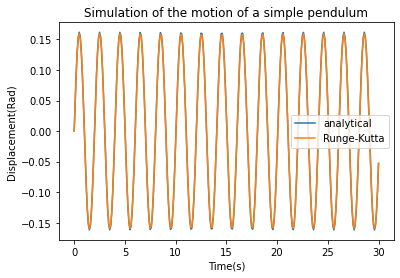

In [11]:
plt.plot(dts,thetas_exact, label = 'analytical' )
plt.plot(dts,thetas_Kutta, label = 'Runge-Kutta' )

plt.xlabel("Time(s)")
plt.ylabel("Displacement(Rad)")
plt.title("Simulation of the motion of a simple pendulum")
plt.legend()
plt.show()

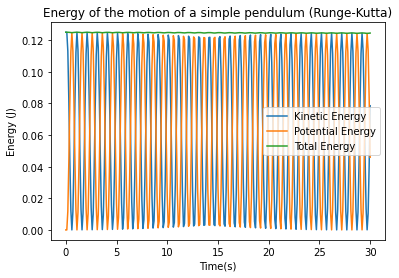

In [12]:
plt.plot(dts,KE_s_Kutta, label = "Kinetic Energy" )
plt.plot(dts,PE_s_Kutta, label = "Potential Energy")
plt.plot(dts, TE_vec_Kutta, label = "Total Energy")
plt.xlabel("Time(s)")
plt.ylabel("Energy (J)")
plt.title("Energy of the motion of a simple pendulum (Runge-Kutta)")
plt.legend()

plt.show()

In [13]:
# comparing the error of the two methods against the analytical solution over different step sizes

theta_t0 = 0
omega_t0 = 0.5
dt = 0.5
Ns = 3000
g = 9.8
l = 1
m=1


euler_list = []
kutta_list =[]

step_sizes = np.linspace(0.001, 0.5, 20)

for dt in step_sizes:
    dts, theta_ts_euler, omega_ts_euler, KE_s_euler,PE_s_euler, TE_vec_euler  = euler()
    dts, thetas_exact, omegas_exact, KE_s_exact,PE_s_exact,TE_vec_exact      = exact()
    ts_Kutta, thetas_Kutta , omega_Kutta, KE_s_Kutta,PE_s_Kutta,TE_vec_Kutta = Kutta() 
    
    euler_list.append(mean_squared_error(thetas_exact, theta_ts_euler))
    kutta_list.append(mean_squared_error(thetas_exact, thetas_Kutta))

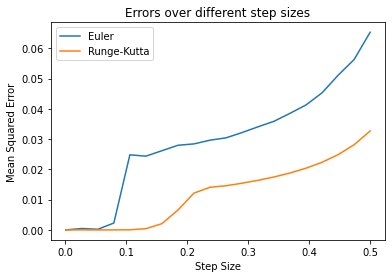

In [14]:
plt.plot(step_sizes, euler_list, label = "Euler")
plt.plot(step_sizes, kutta_list, label = "Runge-Kutta")
plt.xlabel("Step Size")
plt.ylabel("Mean Squared Error")
plt.title("Errors over different step sizes")
plt.legend()
plt.show()

In [15]:
mean_squared_error(thetas_exact, theta_ts_euler)

0.06527840567261531

In [16]:
mean_squared_error(thetas_exact, thetas_Kutta)

0.03267096841581787

# Problem 2

In [17]:
def get_value(row, column, T):
    """
    A function to get the T of each cell by using the discrete Laplace equation. For the walls, I ignore the outside
    cells to model the fact that they are isolated.
    """
    if row ==0 and column ==0:
        value =(1/2) * (T[row+1, column]+T[row, column+1])
        
    elif row==d-1 and column == d-1:
        value =(1/2) * (T[row-1, column]+T[row, column-1])
    
    elif row==0 and column == d-1:
        value = (1/2) * (T[row+1, column]+T[row, column-1])
        
    elif row == d-1 and column ==0:
        value = (1/2) * (T[row-1, column]+T[row, column+1])
    
    elif row == 0:
        value =(1/3) * (T[row+1, column]+T[row, column+1]+T[row, column-1])
    
    elif row == d-1:
        value =(1/3) * (T[row-1, column]+T[row, column+1]+T[row, column-1])
    
    elif column ==0:
        value =(1/3) * (T[row+1, column]+T[row-1, column]+T[row, column+1])
    
    elif column == d-1:
        value =(1/3) * (T[row+1, column]+T[row-1, column]+T[row, column-1])
    else:
        value = (1/4) * (T[row+1, column]+T[row-1, column]+T[row, column+1]+T[row, column-1])
        
    return value

In [18]:
d = 50 # using a grid of 50x50
T = np.zeros((d, d)) 
#placing the griller in the middle of the room:
middle_point = int(d/2)
T[middle_point-2:middle_point+2, middle_point-2:middle_point+2] =100


iteration = 0 # counting how many iterations until convergence

while True: #running the simulation until convergence happens
            # I assume that convergence happens when the change in the average room
            # temperature is less than 0.01
        
        
    iteration+=1
    current_average = np.mean(T) # keeping track of the average room temperature
    
    for row in range(d):
        for column in range(d):
            T[row, column]  =  get_value(row, column, T)
            T[middle_point-2:middle_point+2, middle_point-2:middle_point+2] =100 #keeping the griller at 100
            
    if abs(current_average - np.mean(T)) < 0.01: # if no more significant change in the room temperature
        print(f"Converged after {iteration} iterations")
        break #stop
    else:
        current_average = np.mean(T)
    

Converged after 2874 iterations


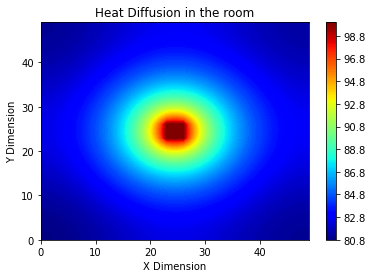

In [19]:
x, y = np.meshgrid(np.arange(0, d), np.arange(0, d))
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(x, y, T, 200,cmap=colourMap)
plt.colorbar()
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.title("Heat Diffusion in the room")
plt.show()

In [20]:
d = 50 # dimension 
T = np.zeros((d, d)) #grid
middle_point = int(d/2) 
T[middle_point-2:middle_point+2, middle_point-2:middle_point+2] =100

T[0, :] =0 # setting the temperature at one corner to 0C


# using the same appraoch as I did above:
iteration = 0
while True:
    iteration+=1
    current_average = np.mean(T)
    for row in range(d):
        for column in range(d):
            T[row, column]  =get_value(row, column, T)
            T[middle_point-2:middle_point+2, middle_point-2:middle_point+2] =100
            T[0, :] =0 # keeping the temp at the corner at 0C
    if abs(current_average - np.mean(T)) < 0.01:
        print(f"Converged after {iteration} iterations")
        break
    else:
        current_average = np.mean(T)
    

Converged after 1416 iterations


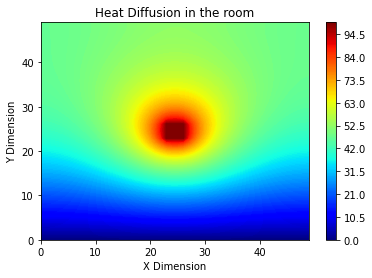

In [21]:
x, y = np.meshgrid(np.arange(0, d), np.arange(0, d))
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(x, y, T, 200,cmap=colourMap)
plt.colorbar()
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.title("Heat Diffusion in the room")
plt.show()

In [22]:
d = 50
T = np.zeros((d, d))
middle_point = int(d/2)
T[middle_point-1:middle_point+1, middle_point-1:middle_point+1] =100


#place 4 people BBQing around the griller:

people_coords = [[20, 15], [20, 16],[19, 15],  [19, 16]]



iteration = 0
while True:
    iteration+=1
    current_average = np.mean(T)
    for row in range(d):
        for column in range(d):
            
        
            value = get_value(row, column, T)
            T[row, column] =value
            
            if [row, column] in people_coords:
                T[row, column] = 25 # assuming that people's bodies stay at 25C
            else:
                T[0, :] =0

            T[middle_point-1:middle_point+1, middle_point-1:middle_point+1] =100
            
    if abs(current_average - np.mean(T)) < 0.01:
        print(f"Converged after {iteration} iterations")
        break
    else:
        current_average = np.mean(T)
    

Converged after 1129 iterations


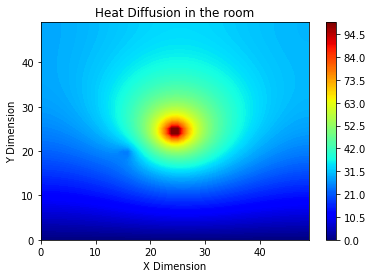

In [23]:
x, y = np.meshgrid(np.arange(0, d), np.arange(0, d))
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(x, y, T, 200,cmap=colourMap)
plt.colorbar()
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.title("Heat Diffusion in the room")
plt.show()

In [24]:
d = 50
T = np.zeros((d, d))
middle_point = int(d/2)
T[middle_point-1:middle_point+1, middle_point-1:middle_point+1] =100

T[0, :] =0


#place 4 people around the open window (chatting :D)
people_coords = [[20, 15], [20, 16],[19, 15],  [19, 16]]



iteration = 0
heat_griller  = 100 # starting the griller at 100C

for i in range(1000):
    
    heat_griller -=1 # the griller disipates energy
    iteration+=1
    current_average = np.mean(T)
    for row in range(d):
        for column in range(d):
            value = get_value(row, column, T)
            
            if [row, column] in people_coords:# keeping the temperature of people at 25
                T[row, column] = 25
            else:
                T[row, column] =value
            
            T[0, :] =0
            if heat_griller >0:
                T[middle_point-1:middle_point+1, middle_point-1:middle_point+1] =max(heat_griller, 0)
                
            
   

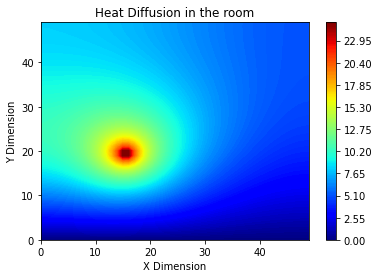

In [25]:
x, y = np.meshgrid(np.arange(0, d), np.arange(0, d))
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(x, y, T, 200,cmap=colourMap)
plt.colorbar()
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.title("Heat Diffusion in the room")
plt.show()

# Problem 3

In [26]:
def elastic_pendulum(L_0 = 3, g = 9.8, m = 5, k = 100, L_i = 6, L_dot_i = 0, theta_i = 0.2, theta_dot_i = 0):
    """
    A function that uses the equations of motion of the elsatic pendulum to simulate the system
    """
    
    # setting list for the initial values
    Ls = [L_i]
    L_dots = [L_dot_i]

    thetas = [theta_i]
    theta_dots = [theta_dot_i]
    ts = []
    steps = 30000
    dt =0.0003 # using a small step size

    
    # the initial kinetic and potetnial energies
    elastic_KE = [0.5*m*(L_dot_i**2 + L_i**2 * theta_dot_i**2)]
    elastic_PE = [-m*g*L_i*np.cos(theta_i) + 0.5*k*(L_i-L_0)**2]


    
    
    # running the simulation using the equations that I derived in the report
    for t in range(steps):
        ts.append(t*dt)

        theta_dot_tn = theta_dots[t] -(1/Ls[t]) * ( g*np.sin(thetas[t]) + 2*theta_dots[t]*L_dots[t])*dt

        L_dot_tn = L_dots[t] + (1/m) * (m*Ls[t]*(theta_dots[t]**2)-k*(Ls[t]-L_0)+m*g*np.cos(thetas[t]) )*dt


        theta_tn = thetas[t] + theta_dot_tn*dt

        L_tn = Ls[t] + L_dot_tn*dt

        Ls.append(L_tn)
        L_dots.append(L_dot_tn)

        thetas.append(theta_tn)
        theta_dots.append(theta_dot_tn)

        elastic_KE.append(0.5*m*( (L_dot_tn**2) + (L_tn**2) * (theta_dot_tn**2)))
        elastic_PE.append(-m*g*L_tn*np.cos(theta_tn) + 0.5*k*(L_tn-L_0)**2)


    ts.append(steps*dt)
    # the total energy:
    TE_vec_elastic = np.add(elastic_KE,elastic_PE)
    
    return ts, Ls, L_dots, thetas, theta_dots, elastic_KE, elastic_PE, TE_vec_elastic

ts, Ls, L_dots, thetas, theta_dots, elastic_KE, elastic_PE, TE_vec_elastic = elastic_pendulum()

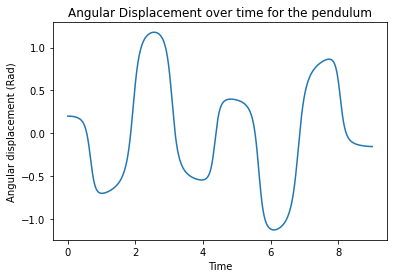

In [27]:
plt.plot(ts, thetas)
plt.xlabel("Time")
plt.ylabel("Angular displacement (Rad)")
plt.title("Angular Displacement over time for the pendulum")
plt.show()

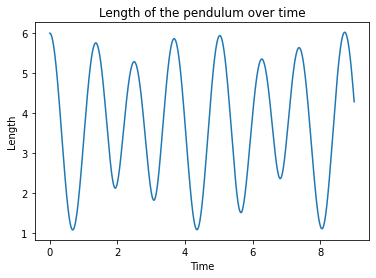

In [28]:
plt.plot(ts, Ls)
plt.xlabel("Time")
plt.ylabel("Length")
plt.title("Length of the pendulum over time")
plt.show()

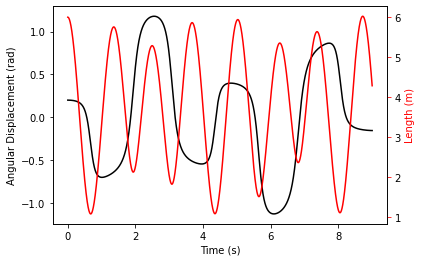

In [29]:
fig, ax1 = plt.subplots()

ax1.plot(ts, thetas, color = 'black')
ax1.tick_params(axis='y')
ax1.set_ylabel('Angular Displacement (rad)', color = 'black') 

ax1.set_xlabel('Time (s)')
ax2 = ax1.twinx()  

ax2.set_ylabel('Length (m)', color ='red')

ax2.plot(ts, Ls, color = 'red')
ax2.tick_params(axis='y', color = "red")



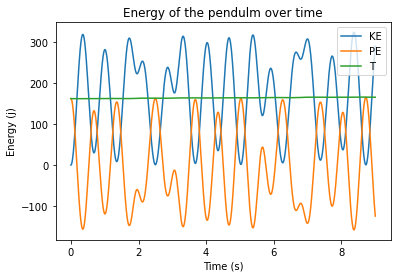

In [30]:
plt.plot(ts, elastic_KE, label="KE")
plt.plot(ts, elastic_PE, label = "PE")
plt.plot(ts, TE_vec_elastic, label = "T")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Energy (j)")
plt.title("Energy of the pendulm over time")
plt.show()

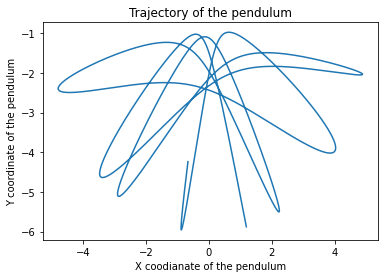

In [31]:
x = np.array(Ls)*np.sin(np.array(thetas))
y = -np.array(Ls)*np.cos(np.array(thetas))
plt.plot(x, y)
plt.xlabel("X coodianate of the pendulum")
plt.ylabel("Y coordinate of the pendulum")
plt.title("Trajectory of the pendulum")
plt.show()

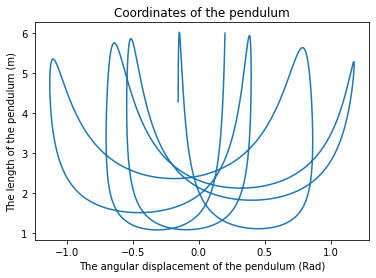

In [32]:
plt.plot(thetas, Ls)
plt.xlabel("The angular displacement of the pendulum (Rad)")
plt.ylabel("The length of the pendulum (m)")
plt.title("Coordinates of the pendulum")
plt.show()

In [33]:
# Running simulation for a system at rest state
ts, Ls, L_dots, thetas, theta_dots, elastic_KE, elastic_PE, TE_vec_elastic = elastic_pendulum(L_0 = 3, g = 9.8, m = 5,
                                                          k = 100, L_i = 3, L_dot_i = 0, theta_i = 0, theta_dot_i = 0)

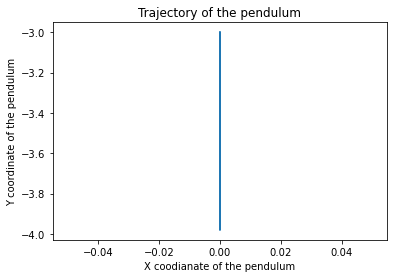

In [34]:
x = np.array(Ls)*np.sin(np.array(thetas))
y = -np.array(Ls)*np.cos(np.array(thetas))
plt.plot(x, y)
plt.xlabel("X coodianate of the pendulum")
plt.ylabel("Y coordinate of the pendulum")
plt.title("Trajectory of the pendulum")
plt.show()

In [35]:
#Running simulation for a system at rest state but with high k
ts, Ls, L_dots, thetas, theta_dots, elastic_KE, elastic_PE, TE_vec_elastic = elastic_pendulum(L_0 = 3, g = 9.8, m = 5,
                                                          k = 9000, L_i = 3, L_dot_i = 0, theta_i = 0, theta_dot_i = 0)

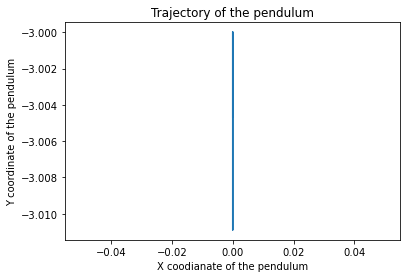

In [36]:
x = np.array(Ls)*np.sin(np.array(thetas))
y = -np.array(Ls)*np.cos(np.array(thetas))
plt.plot(x, y)
plt.xlabel("X coodianate of the pendulum")
plt.ylabel("Y coordinate of the pendulum")
plt.title("Trajectory of the pendulum")
plt.show()

In [37]:
# high k and displacement
ts, Ls, L_dots, thetas, theta_dots, elastic_KE, elastic_PE, TE_vec_elastic = elastic_pendulum(L_0 = 3, g = 9.8, m = 5,
                                                          k = 9000, L_i = 3, L_dot_i = 0, theta_i = 0.2, theta_dot_i = 0)

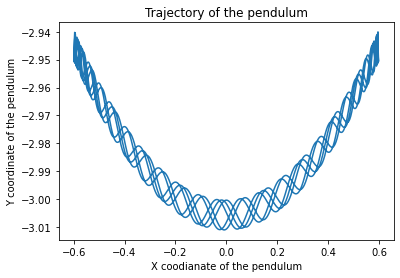

In [38]:
x = np.array(Ls)*np.sin(np.array(thetas))
y = -np.array(Ls)*np.cos(np.array(thetas))
plt.plot(x, y)
plt.xlabel("X coodianate of the pendulum")
plt.ylabel("Y coordinate of the pendulum")
plt.title("Trajectory of the pendulum")
plt.show()